In [309]:
import numpy as np
import pandas as pd
import scipy.io as sio
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [310]:
# 1.a

In [311]:
df = pd.read_excel('face_data.xlsx')

In [312]:
M = df.to_numpy()
M.shape

(9999, 785)

In [313]:
MT = M.T
MT.shape

(785, 9999)

In [314]:
X = MT[:-1, 1000:5000]
X.shape

(784, 4000)

In [315]:
Y = MT[784, 1000:5000]
Y[Y == -1] = 0
Y = Y.reshape(1, Y.shape[0])
Y.shape

(1, 4000)

In [336]:
def plot_25_images(tags):
    indices = np.where(Y == tags)[1]
    selected_indices = np.random.choice(indices, 25, replace=False)

    num_images = 25

    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[selected_indices[i], :, :], cmap='gray')
        plt.title("Image: " + str(selected_indices[i]))
        plt.axis('off')

    plt.suptitle("Sample Face Images", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

In [337]:
# 1.b

In [338]:
images = M[1000:5000, :-1].reshape((X.shape[1], 28, 28))
images = np.rot90(images, k=-1, axes=(1, 2))

In [339]:
# 1.c

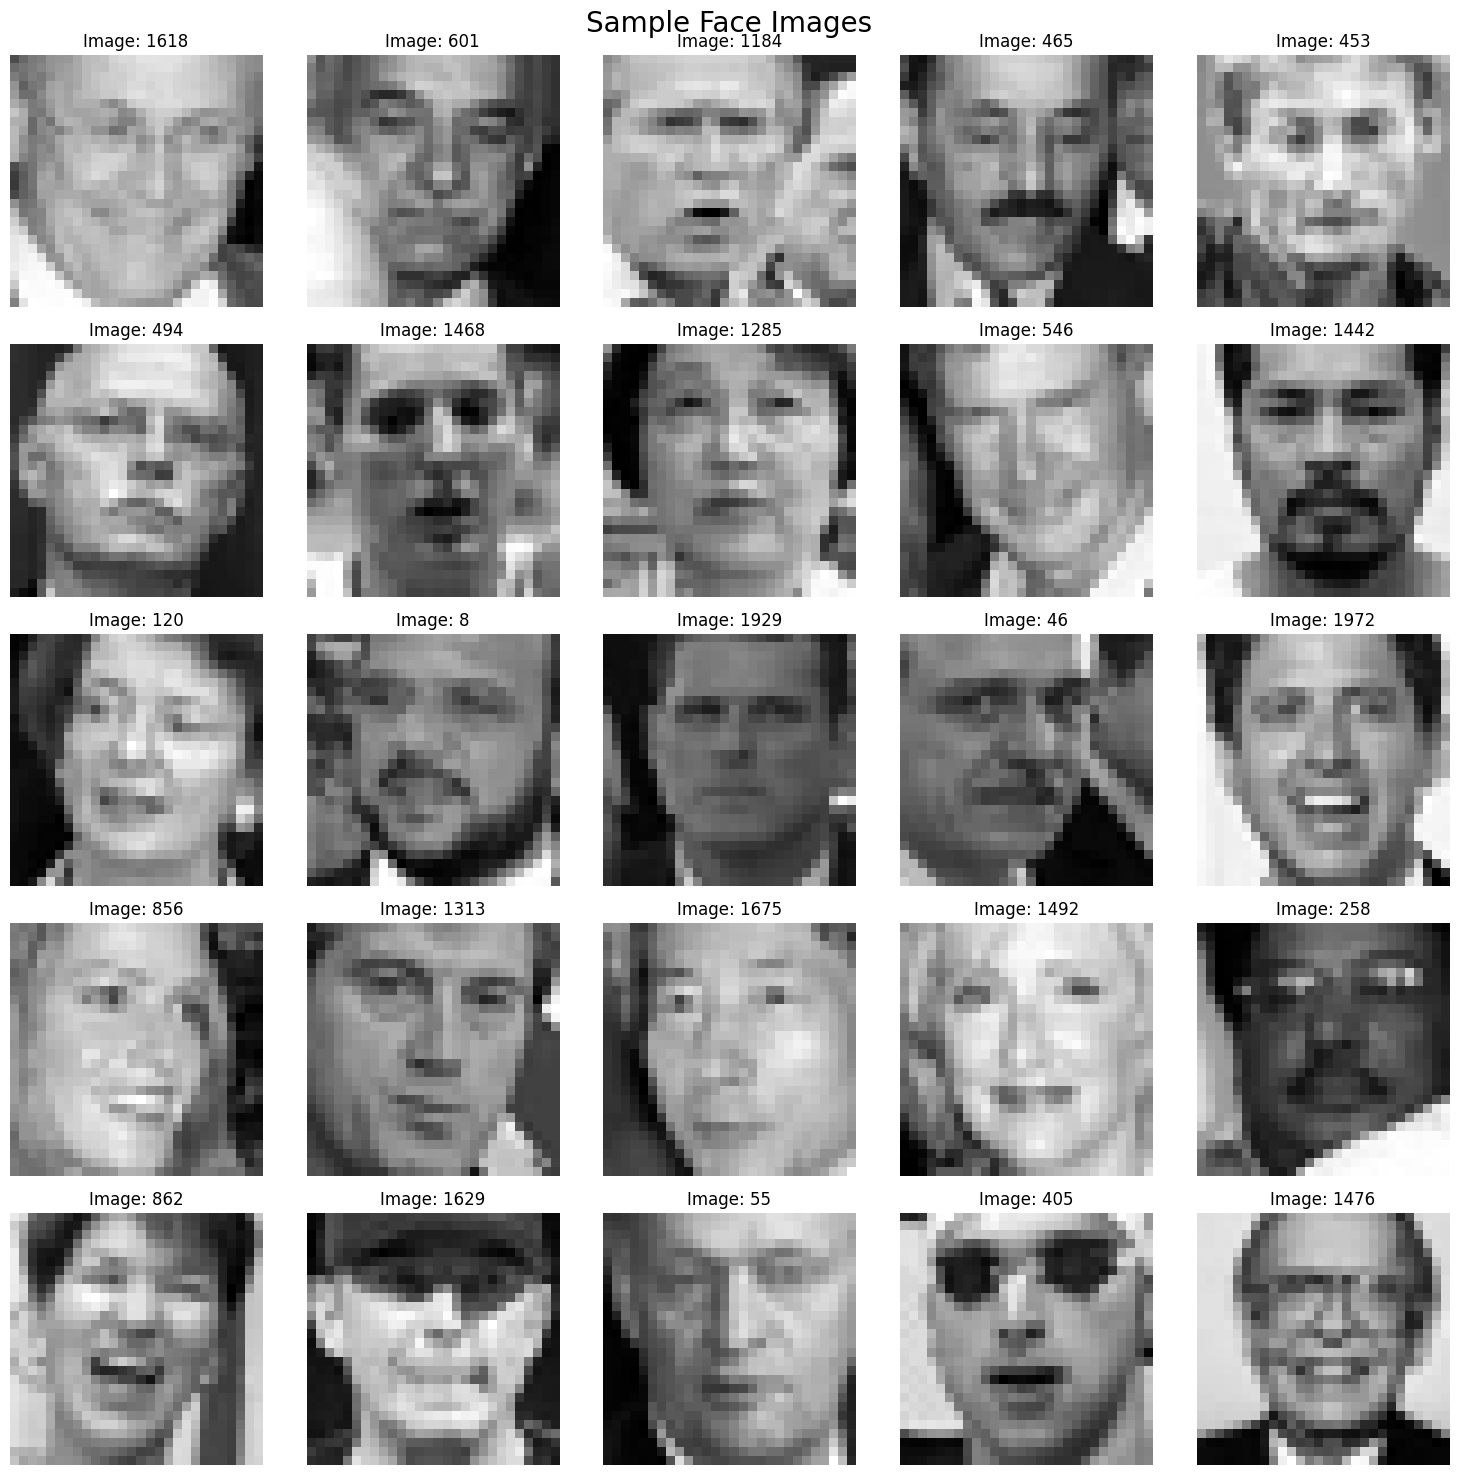

In [340]:
plot_25_images(1)

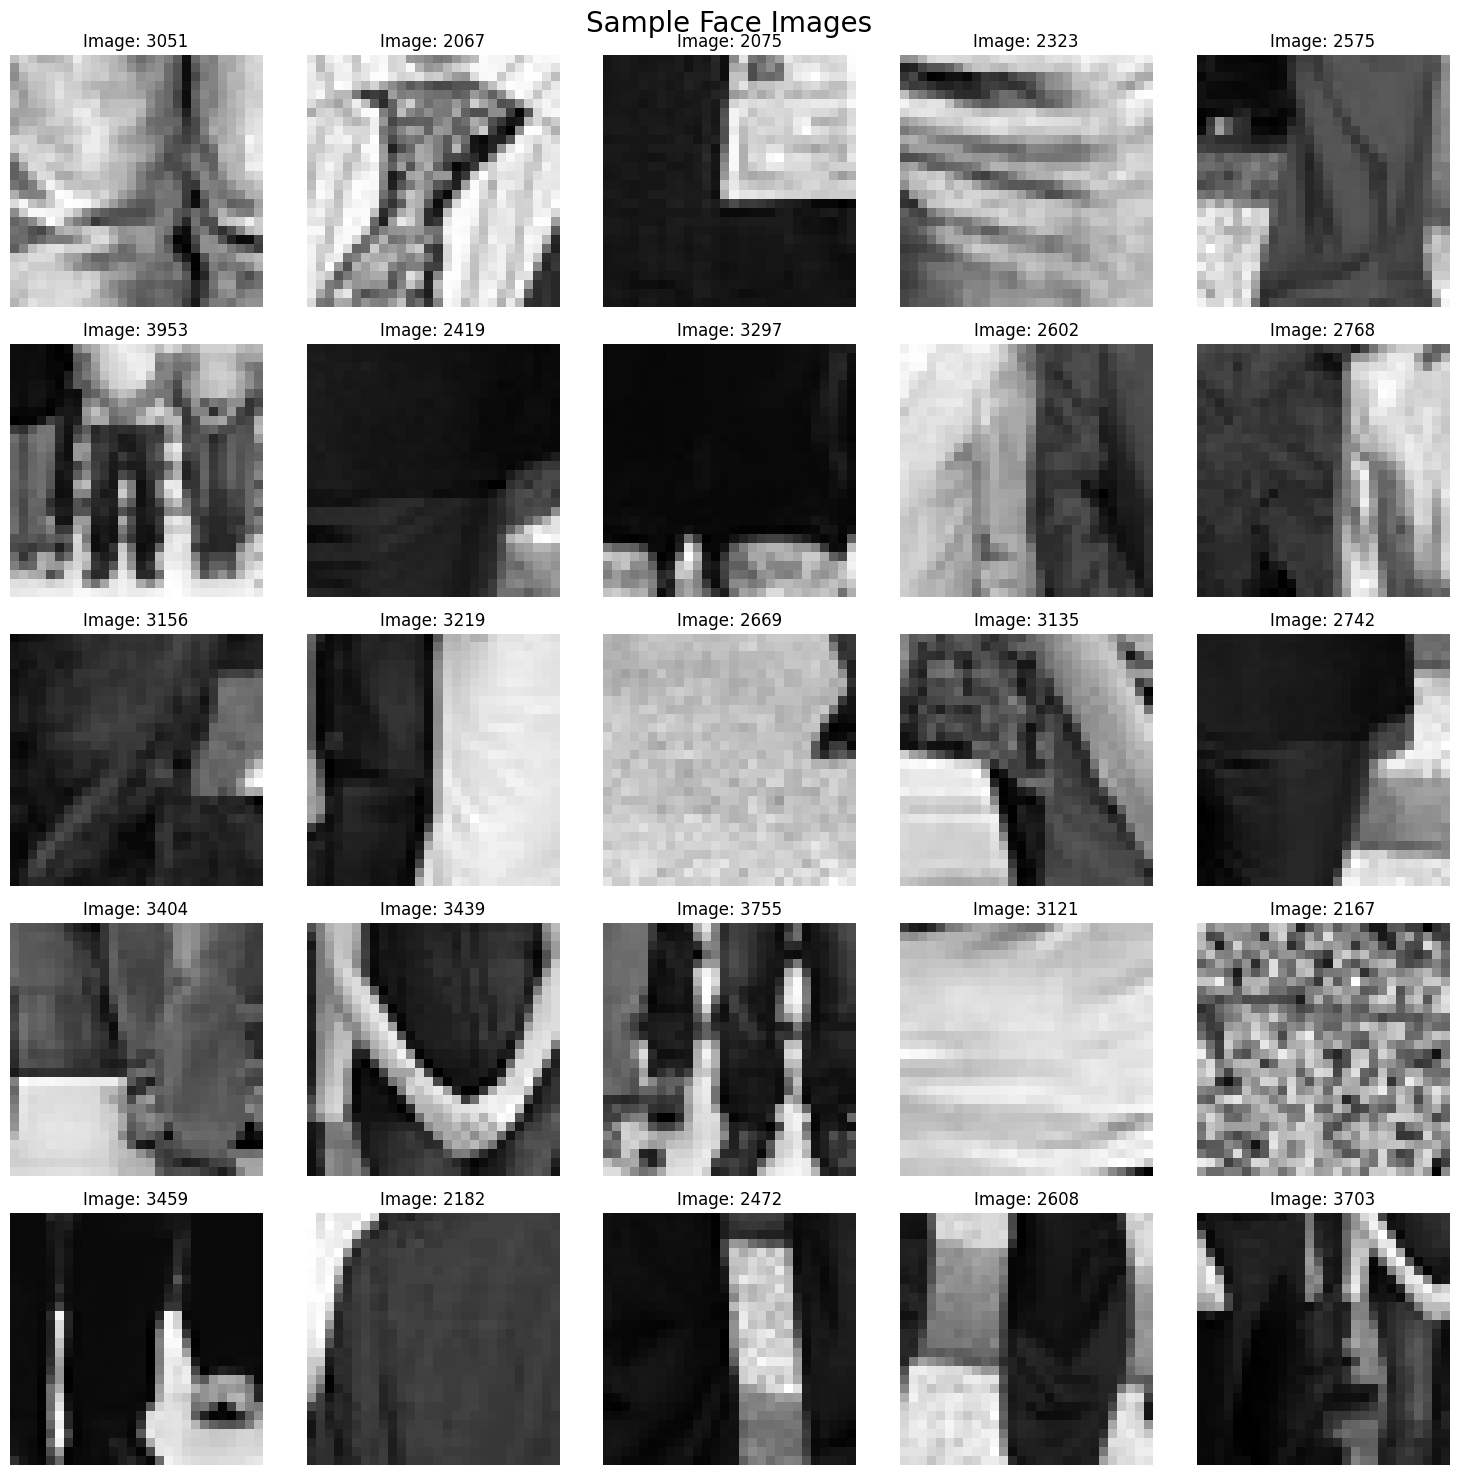

In [341]:
plot_25_images(0)

In [342]:

# 1.d

In [343]:
def build_model(layers_size, layers_activation, alpha, regu_lambda):
    model = keras.Sequential()
    for i, function in enumerate(layers_activation):
        model.add(keras.layers.Dense(layers_size[i], activation=function,
                                     kernel_regularizer=keras.regularizers.l2(regu_lambda)))
    opt = keras.optimizers.Adam(learning_rate=alpha)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [344]:
# 1.e

In [345]:
X_train, X_val, y_train, y_val = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)

hidden_units_options = [[32, 1], [64, 1], [128, 1]]
alpha_options = [0.001, 0.01, 0.1]
reg_options = [0.001, 0.01, 0.1]

best_accuracy_1 = 0
params_1 = []
best_params_1 = {}
best_model_1 = 0

for hidden in hidden_units_options:
    for alpha in alpha_options:
        for reg in reg_options:
            model = build_model(hidden, ['relu', 'sigmoid'], alpha, reg)
            model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
            _, accuracy = model.evaluate(X_val, y_val, verbose=0)
            carr_params = {'Hidden Units': hidden, 'Alpha': alpha, 'Reg': reg, 'Accuracy': accuracy}
            params_1.append(carr_params)
            if accuracy > best_accuracy_1:
                best_model_1 = model
                best_accuracy_1 = accuracy
                best_params_1 = carr_params

print("Parameters and Accuracy: ")
for param in params_1:
    print(f'\t- {param}')
print("Best parameters:", best_params_1)

Parameters and Accuracy: 
	- {'Hidden Units': [32, 1], 'Alpha': 0.001, 'Reg': 0.001, 'Accuracy': 0.9049999713897705}
	- {'Hidden Units': [32, 1], 'Alpha': 0.001, 'Reg': 0.01, 'Accuracy': 0.8362500071525574}
	- {'Hidden Units': [32, 1], 'Alpha': 0.001, 'Reg': 0.1, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [32, 1], 'Alpha': 0.01, 'Reg': 0.001, 'Accuracy': 0.9437500238418579}
	- {'Hidden Units': [32, 1], 'Alpha': 0.01, 'Reg': 0.01, 'Accuracy': 0.7512500286102295}
	- {'Hidden Units': [32, 1], 'Alpha': 0.01, 'Reg': 0.1, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [32, 1], 'Alpha': 0.1, 'Reg': 0.001, 'Accuracy': 0.8087499737739563}
	- {'Hidden Units': [32, 1], 'Alpha': 0.1, 'Reg': 0.01, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [32, 1], 'Alpha': 0.1, 'Reg': 0.1, 'Accuracy': 0.5274999737739563}
	- {'Hidden Units': [64, 1], 'Alpha': 0.001, 'Reg': 0.001, 'Accuracy': 0.9137499928474426}
	- {'Hidden Units': [64, 1], 'Alpha': 0.001, 'Reg': 0.01, 'Accuracy': 0.8087499737

In [346]:
# 1.f

In [351]:
X_face_test = sio.loadmat('face_test.mat')

Xtest = X_face_test['Xtest']

ytest = X_face_test['ytest']
ytest = ytest.reshape(-1)
ytest[ytest == -1] = 0

In [352]:
test_loss, test_acc = best_model_1.evaluate(Xtest, ytest)
print('Test accuracy =', test_acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9506 - loss: 0.3110
Test accuracy = 0.9187999963760376


In [353]:
# 1.g

In [354]:
hidden_units_options = [32, 64, 128]
alpha_options = [0.001, 0.01, 0.1]
reg_options = [0.001, 0.01, 0.1]

best_accuracy_2 = 0
params_2 = []
best_params_2 = {}
best_model_2 = 0

for hidden1 in hidden_units_options:
    for alpha in alpha_options:
        for reg in reg_options:
            for hidden2 in hidden_units_options:
                hiddens = [hidden1, hidden2, 1]
                model = build_model(hiddens, ['relu', 'relu', 'sigmoid'], alpha, reg)
                model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
                _, accuracy = model.evaluate(X_val, y_val, verbose=0)
                carr_params = {'Hidden Units': hiddens, 'Alpha': alpha, 'Reg': reg, 'Accuracy': accuracy}
                params_2.append(carr_params)
                if accuracy > best_accuracy_2:
                    best_model_2 = model
                    best_accuracy_2 = accuracy
                    best_params_2 = carr_params

print("Parameters and Accuracy: ")
for param in params_2:
    print(f'\t- {param}')
print("Best parameters:", best_params_2)

Parameters and Accuracy: 
	- {'Hidden Units': [32, 32, 1], 'Alpha': 0.001, 'Reg': 0.001, 'Accuracy': 0.9300000071525574}
	- {'Hidden Units': [32, 64, 1], 'Alpha': 0.001, 'Reg': 0.001, 'Accuracy': 0.9424999952316284}
	- {'Hidden Units': [32, 128, 1], 'Alpha': 0.001, 'Reg': 0.001, 'Accuracy': 0.949999988079071}
	- {'Hidden Units': [32, 32, 1], 'Alpha': 0.001, 'Reg': 0.01, 'Accuracy': 0.9137499928474426}
	- {'Hidden Units': [32, 64, 1], 'Alpha': 0.001, 'Reg': 0.01, 'Accuracy': 0.9075000286102295}
	- {'Hidden Units': [32, 128, 1], 'Alpha': 0.001, 'Reg': 0.01, 'Accuracy': 0.918749988079071}
	- {'Hidden Units': [32, 32, 1], 'Alpha': 0.001, 'Reg': 0.1, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [32, 64, 1], 'Alpha': 0.001, 'Reg': 0.1, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [32, 128, 1], 'Alpha': 0.001, 'Reg': 0.1, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [32, 32, 1], 'Alpha': 0.01, 'Reg': 0.001, 'Accuracy': 0.9462500214576721}
	- {'Hidden Units': [32, 64, 1], 

In [355]:
# 1.f

In [357]:
hiddens_3 = [64, 1]

alpha_options = [0.001, 0.01, 0.1]
reg_options = [0.001, 0.01, 0.1]

best_accuracy_3 = 0
params_3 = []
best_params_3 = {}
best_model_3 = 0

for alpha in alpha_options:
    for reg in reg_options:
        model = build_model(hiddens_3, ['relu', 'sigmoid'], alpha, reg)
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        carr_params = {'Hidden Units': hiddens_3, 'Alpha': alpha, 'Reg': reg, 'Accuracy': accuracy}
        params_3.append(carr_params)
        if accuracy > best_accuracy_3:
            best_model_3 = model
            best_accuracy_3 = accuracy
            best_params_3 = carr_params

print("Parameters and Accuracy with 1 hidden: ")
for param in params_3:
    print(f'\t- {param}')
print("Best parameters:", best_params_3)

Parameters and Accuracy with 1 hidden: 
	- {'Hidden Units': [64, 1], 'Alpha': 0.001, 'Reg': 0.001, 'Accuracy': 0.9162499904632568}
	- {'Hidden Units': [64, 1], 'Alpha': 0.001, 'Reg': 0.01, 'Accuracy': 0.8062499761581421}
	- {'Hidden Units': [64, 1], 'Alpha': 0.001, 'Reg': 0.1, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [64, 1], 'Alpha': 0.01, 'Reg': 0.001, 'Accuracy': 0.9449999928474426}
	- {'Hidden Units': [64, 1], 'Alpha': 0.01, 'Reg': 0.01, 'Accuracy': 0.8075000047683716}
	- {'Hidden Units': [64, 1], 'Alpha': 0.01, 'Reg': 0.1, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [64, 1], 'Alpha': 0.1, 'Reg': 0.001, 'Accuracy': 0.9137499928474426}
	- {'Hidden Units': [64, 1], 'Alpha': 0.1, 'Reg': 0.01, 'Accuracy': 0.5274999737739563}
	- {'Hidden Units': [64, 1], 'Alpha': 0.1, 'Reg': 0.1, 'Accuracy': 0.4724999964237213}
Best parameters: {'Hidden Units': [64, 1], 'Alpha': 0.01, 'Reg': 0.001, 'Accuracy': 0.9449999928474426}


In [358]:
hiddens_4 = [16, 16, 16, 8, 8, 1]

alpha_options = [0.001, 0.01, 0.1]
reg_options = [0.001, 0.01, 0.1]

best_accuracy_4 = 0
params_4 = []
best_params_4 = {}
best_model_4 = 0

for alpha in alpha_options:
    for reg in reg_options:
        model = build_model(hiddens_4, ['relu', 'relu', 'relu', 'relu', 'relu', 'sigmoid'], alpha, reg)
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        carr_params = {'Hidden Units': hiddens_3, 'Alpha': alpha, 'Reg': reg, 'Accuracy': accuracy}
        params_4.append(carr_params)
        if accuracy > best_accuracy_4:
            best_model_4 = model
            best_accuracy_4 = accuracy
            best_params_4 = carr_params

print("Parameters and Accuracy with 3 hidden: ")
for param in params_4:
    print(f'\t- {param}')
print("Best parameters:", best_params_4)

Parameters and Accuracy with 3 hidden: 
	- {'Hidden Units': [64, 1], 'Alpha': 0.001, 'Reg': 0.001, 'Accuracy': 0.9537500143051147}
	- {'Hidden Units': [64, 1], 'Alpha': 0.001, 'Reg': 0.01, 'Accuracy': 0.9262499809265137}
	- {'Hidden Units': [64, 1], 'Alpha': 0.001, 'Reg': 0.1, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [64, 1], 'Alpha': 0.01, 'Reg': 0.001, 'Accuracy': 0.9424999952316284}
	- {'Hidden Units': [64, 1], 'Alpha': 0.01, 'Reg': 0.01, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [64, 1], 'Alpha': 0.01, 'Reg': 0.1, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [64, 1], 'Alpha': 0.1, 'Reg': 0.001, 'Accuracy': 0.5274999737739563}
	- {'Hidden Units': [64, 1], 'Alpha': 0.1, 'Reg': 0.01, 'Accuracy': 0.4724999964237213}
	- {'Hidden Units': [64, 1], 'Alpha': 0.1, 'Reg': 0.1, 'Accuracy': 0.5274999737739563}
Best parameters: {'Hidden Units': [64, 1], 'Alpha': 0.001, 'Reg': 0.001, 'Accuracy': 0.9537500143051147}


In [359]:
best_acc = '1' if best_params_3['Accuracy'] > best_params_4['Accuracy'] else '5'
print(f'The best accuracy is with {best_acc} hidden(s)')

The best accuracy is with 5 hidden(s)


In [360]:
# 1.g

In [361]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [362]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

print("X_train shape =", X_train.shape)
print("type of X_train = ", X_train.dtype)


X_train shape = (55000, 28, 28)
type of X_train =  uint8


In [363]:
# scale the pixel intensities down to 0-1 range by dividing them by 255.0
# this also converts them to floats.
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

# We will use a list of class names for Fashion MNIST to know the classes    
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

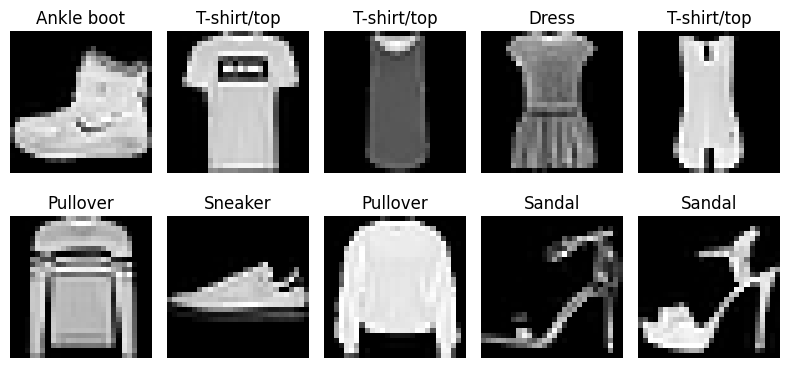

In [364]:
# presenting some data
num_images = 10

plt.figure(figsize=(8, 4))

for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i, :, :], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [368]:
def build_model_2(sequence, act_functions):
    model = keras.Sequential()
    for i, act_function in enumerate(act_functions):
        model.add(keras.layers.Dense(sequence[i], activation=act_function))
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

In [376]:
hidden_units_options = [8, 16, 64]
activation_func = ['sigmoid', 'softmax']
num_output = np.unique(y_train).size

best_accuracy_5 = 0
params_5 = []
best_params_5 = {}
best_model_5 = 0

X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


for hidden1 in hidden_units_options:
    for hidden2 in hidden_units_options:
        hidden = [hidden1, hidden2, num_output]
        for activation_f in activation_func:
            model = build_model_2(hidden, ['relu', 'relu', activation_f])
            model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), verbose=0)
            _, accuracy = model.evaluate(X_val, y_val, verbose=0)
            carr_params = {'Activation function': activation_f, 'Hidden Units': hidden, 'Accuracy': accuracy}
            params_5.append(carr_params)
            if accuracy > best_accuracy_5:
                best_model_5 = model
                best_accuracy_5 = accuracy
                best_params_5 = carr_params

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.0000e+00 - loss: 3.7473
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0450 - loss: 3.7439  
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0720 - loss: 3.5353  
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.0114 - loss: 3.7527   
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0012 - loss: 4.7921      
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.0889 - loss: 3.1173
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.0200 - loss: 4.0028    
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0373 - loss: 3.4681      
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0729 - loss: 3.1146  
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0115 - loss: 2.8448      
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.0791 - loss: 3.2999
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0333 - loss: 3.6898  
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0450 - loss: 4.0536  
2

In [377]:
_, acc_test = best_model_5.evaluate(X_test, y_test, verbose=0)
_, acc_train = best_model_5.evaluate(X_train, y_train, verbose=0)

print(f"Train accuracy: {acc_train}")
print(f"Validation accuracy: {best_accuracy_5}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.9134727120399475
Validation accuracy: 0.20374999940395355
Test accuracy: 0.9187999963760376
